In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
y = pd.read_csv('Train_Labels.csv', sep=',')
X = pd.read_csv('Train_Values2.csv', sep=',')
building_id = X.building_id.values.tolist()
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [3]:
X = X.merge(y, on = 'building_id')
category_cols = ['count_floors_pre_eq','roof_type','foundation_type','land_surface_condition','ground_floor_type','other_floor_type','position','plan_configuration','legal_owner','ship_status']

In [4]:
X.isna().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

In [5]:
X.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [6]:
y

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [7]:
X.shape

(260601, 40)

In [8]:
y.drop(['building_id'], axis = 1, inplace = True)
y = np.asarray(y)
y = y.ravel()

Text(0.5, 1.0, 'Number of Buildings of Each Damage Grade')

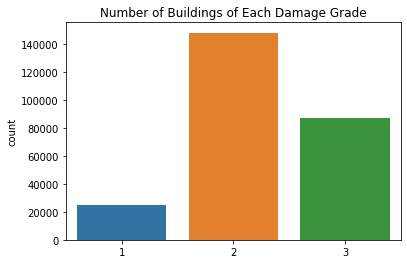

In [9]:
sns.countplot(y).set_title('Number of Buildings of Each Damage Grade')

(array([5.9738e+04, 7.4906e+04, 3.2182e+04, 4.2394e+04, 2.1269e+04,
        4.7110e+03, 9.2900e+03, 4.7350e+03, 1.9750e+03, 3.5670e+03,
        1.9320e+03, 4.1400e+02, 1.4530e+03, 1.2100e+02, 1.8000e+02,
        4.6000e+01, 1.4000e+01, 3.0000e+00, 1.4300e+02, 8.0000e+00,
        6.0000e+00, 1.2000e+01, 4.0000e+00, 2.0000e+00, 1.0600e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

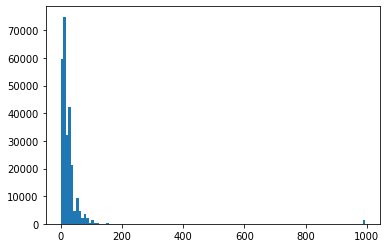

In [10]:
plt.hist(X.age, bins =120)

In [11]:
X.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [12]:
unique = X.age.unique()
unique[::-1].sort()
unique

array([995, 200, 195, 190, 185, 180, 175, 170, 165, 160, 155, 150, 145,
       140, 135, 130, 125, 120, 115, 110, 105, 100,  95,  90,  85,  80,
        75,  70,  65,  60,  55,  50,  45,  40,  35,  30,  25,  20,  15,
        10,   5,   0], dtype=int64)

In [13]:
age = X.age.values.tolist()
new_age = [200 if x >= 200 else x for x in age]
X.drop(['age'], axis = 1, inplace = True)
new_age = np.array(new_age)
age = (new_age - np.mean(new_age)) / np.std(new_age)
X.age = age.T

C:\Users\Aishwarya Singh\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


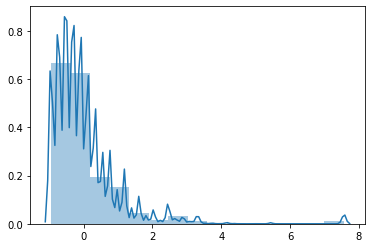

In [14]:
sns.distplot(X.age,bins = 15, kde = True)

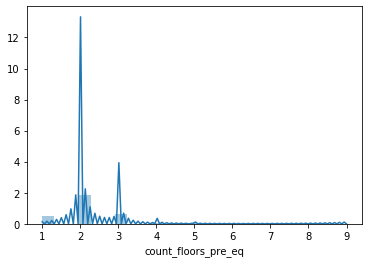

In [15]:
sns.distplot(X['count_floors_pre_eq'], bins = 25, kde = True)

In [16]:
X.count_floors_pre_eq.value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

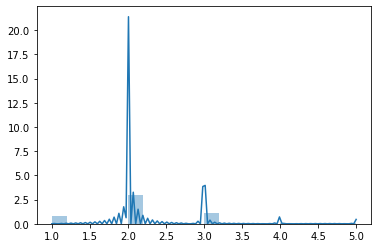

In [17]:
floors = X.count_floors_pre_eq.values.tolist()
new_floors = [5 if x >= 5 else x for x in floors]
new_floors = np.array(new_floors)
sns.distplot(new_floors, bins = 20, kde = True)

In [18]:
floors = (new_floors - np.mean(new_floors)) / np.std(new_floors)
X.drop(['count_floors_pre_eq'], axis = 1, inplace = True)
X.count_floors_pre_eq = floors.T

C:\Users\Aishwarya Singh\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


(array([2.1209e+05, 4.4021e+04, 3.4980e+03, 6.6600e+02, 1.5700e+02,
        7.9000e+01, 4.7000e+01, 2.2000e+01, 1.7000e+01, 4.0000e+00]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

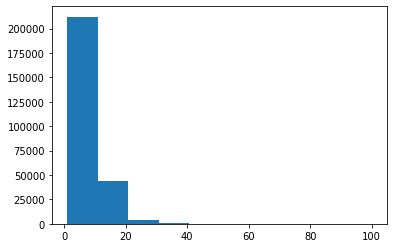

In [19]:
plt.hist(X['area_percentage'], bins = 10)

C:\Users\Aishwarya Singh\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


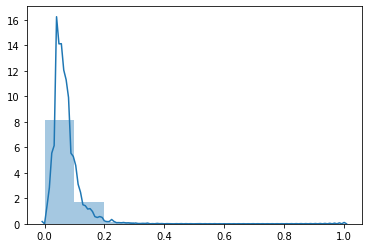

In [20]:
ap = X['area_percentage'].values
ap = (ap - min(ap)) / (max(ap) - min(ap))
X.drop(['area_percentage'], axis = 1, inplace = True)
X.area_percentage = ap.T
sns.distplot(X.area_percentage, bins = 10)

(array([3.5262e+04, 3.7763e+04, 7.8513e+04, 4.6477e+04, 3.5465e+04,
        1.9278e+04, 4.4920e+03, 9.1700e+02, 9.0700e+02, 7.5900e+02,
        3.5800e+02, 1.7900e+02, 9.0000e+00, 7.1000e+01, 7.0000e+00,
        4.6000e+01, 0.0000e+00, 1.1000e+01, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 7.6000e+01]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ,
        15.2, 16.4, 17.6, 18.8, 20. , 21.2, 22.4, 23.6, 24.8, 26. , 27.2,
        28.4, 29.6, 30.8, 32. ]),
 <a list of 25 Patch objects>)

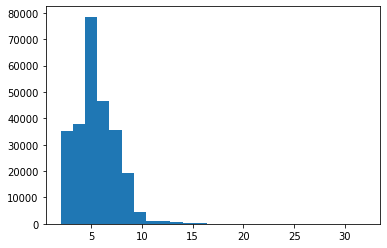

In [21]:
plt.hist(X['height_percentage'], bins = 25)

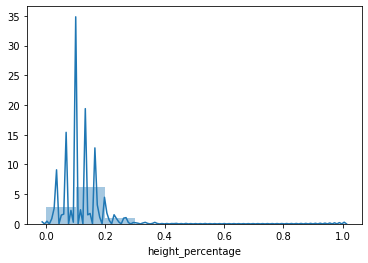

In [22]:
hp = X['height_percentage'].values
hp = (hp - min(hp)) / (max(hp) - min(hp))
X.drop(['height_percentage'], axis = 1, inplace = True)
X['height_percentage'] = hp.T
sns.distplot(X['height_percentage'], bins = 10)

In [23]:
X.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,height_percentage
0,802906,6,487,12198,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.100000
1,28830,8,900,2812,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.166667
2,94947,21,363,8973,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.100000
3,590882,22,418,10694,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,0.100000
4,201944,11,131,1488,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3,0.233333


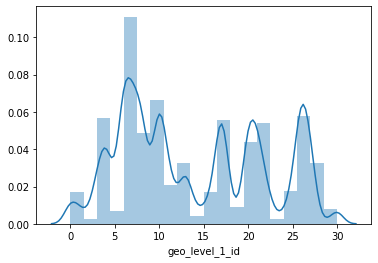

In [24]:
sns.distplot(X['geo_level_1_id'], bins = 20, kde = True)

In [25]:
cuts = pd.cut(X['geo_level_1_id'], 20)
X.drop(['geo_level_1_id'], axis = 1, inplace = True)
le = LabelEncoder()
trans = le.fit_transform(cuts)
X['geo_level_1_id'] = cuts.T

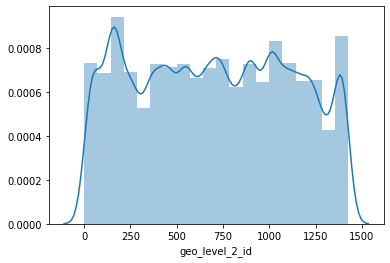

In [26]:
sns.distplot(X['geo_level_2_id'], bins = 20)

In [27]:
cuts = pd.cut(X['geo_level_2_id'], 20)
X.drop(['geo_level_2_id'], axis = 1, inplace = True)
le = LabelEncoder()
cuts = le.fit_transform(cuts)
X['geo_level_2_id'] = cuts.T

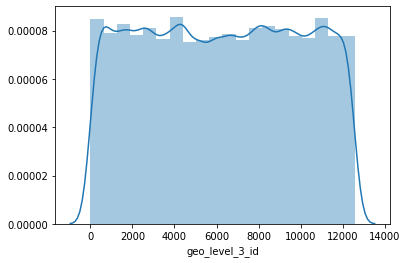

In [28]:
sns.distplot(X['geo_level_3_id'], bins = 20)

In [29]:
temp = X['geo_level_3_id'].values
temp = (temp - min(temp)) / (max(temp) - min(temp))
X.drop(['geo_level_3_id'], axis = 1, inplace = True)
X['geo_level_3_id'] = temp.T

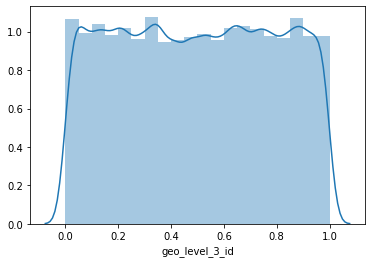

In [30]:
sns.distplot(X['geo_level_3_id'], bins = 20)

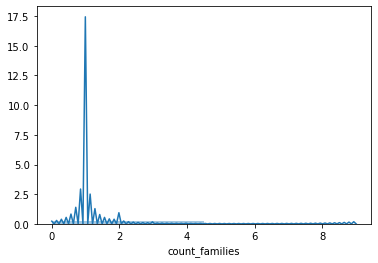

In [31]:
sns.distplot(X['count_families'], bins = 2)

In [32]:
X['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [33]:
cf = X['count_families'].values.tolist()
cf_new = [4 if x >= 4 else x for x in cf]
X.drop(['count_families'], axis = 1, inplace = True)
X['count_families'] = np.array(cf_new).T

In [34]:
category_cols = ['geo_level_1_id', 
                 'geo_level_2_id', 
                 'roof_type', 
                 'foundation_type', 
                 'land_surface_condition', 
                 'ground_floor_type', 
                 'other_floor_type', 
                 'position', 
                 'plan_configuration', 
                 'legal_ownership_status']
X = pd.get_dummies(X, columns = category_cols)

In [35]:
X.drop(['building_id','damage_grade'], axis = 1, inplace = True)
X.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,height_percentage,geo_level_3_id,count_families,"geo_level_1_id_(-0.03, 1.5]","geo_level_1_id_(1.5, 3.0]","geo_level_1_id_(3.0, 4.5]","geo_level_1_id_(4.5, 6.0]","geo_level_1_id_(6.0, 7.5]","geo_level_1_id_(7.5, 9.0]","geo_level_1_id_(9.0, 10.5]","geo_level_1_id_(10.5, 12.0]","geo_level_1_id_(12.0, 13.5]","geo_level_1_id_(13.5, 15.0]","geo_level_1_id_(15.0, 16.5]","geo_level_1_id_(16.5, 18.0]","geo_level_1_id_(18.0, 19.5]","geo_level_1_id_(19.5, 21.0]","geo_level_1_id_(21.0, 22.5]","geo_level_1_id_(22.5, 24.0]","geo_level_1_id_(24.0, 25.5]","geo_level_1_id_(25.5, 27.0]","geo_level_1_id_(27.0, 28.5]","geo_level_1_id_(28.5, 30.0]",geo_level_2_id_0,geo_level_2_id_1,geo_level_2_id_2,geo_level_2_id_3,geo_level_2_id_4,...,geo_level_2_id_8,geo_level_2_id_9,geo_level_2_id_10,geo_level_2_id_11,geo_level_2_id_12,geo_level_2_id_13,geo_level_2_id_14,geo_level_2_id_15,geo_level_2_id_16,geo_level_2_id_17,geo_level_2_id_18,geo_level_2_id_19,roof_type_n,roof_type_q,roof_type_x,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.100000,0.970637,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.166667,0.223761,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.100000,0.714013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.100000,0.850959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.233333,0.118405,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [37]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [40]:
import keras
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [41]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu', input_dim = 103))
    classifier.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 3, activation = 'softmax'))
    classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

In [42]:
classifier = KerasClassifier(build_fn = build_classifier)

In [43]:
parameters = {'batch_size': [25, 32],
             'epochs': [20, 100],
             'optimizer': ['adam', 'rmsprop']}

#reduce learning rate

In [44]:
grid_search = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/20
187632/187632 [==============================] - 14s 72us/step - loss: 0.7180 - accuracy: 0.6592
Epoch 2/20
187632/187632 [==============================] - 13s 68us/step - loss: 0.6881 - accuracy: 0.6805
Epoch 3/20
187632/187632 [==============================] - 13s 68us/step - loss: 0.6763 - accuracy: 0.6860
Epoch 4/20
187632/187632 [==============================] - 12s 65us/step - loss: 0.6681 - accuracy: 0.6915
Epoch 5/20
187632/187632 [==============================] - 13s 67us/step - loss: 0.6632 - accuracy: 0.6929
Epoch 6/20
187632/187632 [==============================] - 13s 67us/step - loss: 0.6588 - accuracy: 0.6955
Epoch 7/20
187632/187632 [==============================] - 13s 67us/step - loss: 0.6562 - accuracy: 0.6963
Epoch 8/20
187632/187632 [==============================] - 12s 66us/step - loss: 0.6538 - accuracy: 0.6983
Epoch 9/20
187632/187632 [==============================] - 13s 67us/step - loss: 0.6517 - accuracy: 0.6983
Epoch 10/20
187632/187632 [=

187632/187632 [==============================] - 12s 64us/step - loss: 0.6462 - accuracy: 0.7016
Epoch 12/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6441 - accuracy: 0.7031
Epoch 13/20
187632/187632 [==============================] - 12s 63us/step - loss: 0.6424 - accuracy: 0.7037
Epoch 14/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6404 - accuracy: 0.7044
Epoch 15/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6393 - accuracy: 0.7054
Epoch 16/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6379 - accuracy: 0.7060
Epoch 17/20
187632/187632 [==============================] - 12s 63us/step - loss: 0.6364 - accuracy: 0.7069
Epoch 18/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6354 - accuracy: 0.7074
Epoch 19/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6339 - accuracy: 0.7086
Epoch 20/20
187632/187632 [====

187632/187632 [==============================] - 13s 67us/step - loss: 0.7169 - accuracy: 0.6591
Epoch 2/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6881 - accuracy: 0.6798
Epoch 3/20
187632/187632 [==============================] - 12s 65us/step - loss: 0.6768 - accuracy: 0.6873
Epoch 4/20
187632/187632 [==============================] - 12s 65us/step - loss: 0.6696 - accuracy: 0.6894
Epoch 5/20
187632/187632 [==============================] - 12s 65us/step - loss: 0.6643 - accuracy: 0.6933
Epoch 6/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6603 - accuracy: 0.6951
Epoch 7/20
187632/187632 [==============================] - 12s 65us/step - loss: 0.6568 - accuracy: 0.6967
Epoch 8/20
187632/187632 [==============================] - 12s 65us/step - loss: 0.6540 - accuracy: 0.6978
Epoch 9/20
187632/187632 [==============================] - 12s 65us/step - loss: 0.6513 - accuracy: 0.6982
Epoch 10/20
187632/187632 [============

187632/187632 [==============================] - 17s 92us/step - loss: 0.6170 - accuracy: 0.7167
Epoch 50/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6165 - accuracy: 0.7163
Epoch 51/100
187632/187632 [==============================] - 16s 83us/step - loss: 0.6164 - accuracy: 0.7152
Epoch 52/100
187632/187632 [==============================] - 15s 79us/step - loss: 0.6154 - accuracy: 0.7170
Epoch 53/100
187632/187632 [==============================] - 14s 73us/step - loss: 0.6157 - accuracy: 0.7162
Epoch 54/100
187632/187632 [==============================] - 13s 67us/step - loss: 0.6150 - accuracy: 0.7168
Epoch 55/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6146 - accuracy: 0.7174
Epoch 56/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6145 - accuracy: 0.7170
Epoch 57/100
187632/187632 [==============================] - 13s 71us/step - loss: 0.6144 - accuracy: 0.7175
Epoch 58/100
187632/187

187632/187632 [==============================] - 19s 103us/step - loss: 0.6043 - accuracy: 0.7228
Epoch 96/100
187632/187632 [==============================] - 19s 100us/step - loss: 0.6041 - accuracy: 0.7235
Epoch 97/100
187632/187632 [==============================] - 18s 96us/step - loss: 0.6037 - accuracy: 0.72350s - loss: 0.604
Epoch 98/100
187632/187632 [==============================] - 19s 99us/step - loss: 0.6031 - accuracy: 0.7234
Epoch 99/100
187632/187632 [==============================] - 19s 103us/step - loss: 0.6039 - accuracy: 0.7231
Epoch 100/100
187632/187632 [==============================] - 17s 91us/step - loss: 0.6032 - accuracy: 0.7234
Epoch 1/100
187632/187632 [==============================] - 18s 95us/step - loss: 0.7182 - accuracy: 0.6592
Epoch 2/100
187632/187632 [==============================] - 15s 82us/step - loss: 0.6884 - accuracy: 0.6812
Epoch 3/100
187632/187632 [==============================] - 15s 79us/step - loss: 0.6763 - accuracy: 0.6880
Epoch 

187632/187632 [==============================] - 13s 70us/step - loss: 0.6204 - accuracy: 0.7140
Epoch 43/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6203 - accuracy: 0.7140
Epoch 44/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6200 - accuracy: 0.7147
Epoch 45/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6197 - accuracy: 0.7145
Epoch 46/100
187632/187632 [==============================] - 14s 73us/step - loss: 0.6192 - accuracy: 0.7150
Epoch 47/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6188 - accuracy: 0.7146
Epoch 48/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6184 - accuracy: 0.7144
Epoch 49/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6181 - accuracy: 0.7152
Epoch 50/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6184 - accuracy: 0.7147
Epoch 51/100
187632/187

187632/187632 [==============================] - 13s 67us/step - loss: 0.6103 - accuracy: 0.7204
Epoch 91/100
187632/187632 [==============================] - 12s 66us/step - loss: 0.6101 - accuracy: 0.7204
Epoch 92/100
187632/187632 [==============================] - 13s 67us/step - loss: 0.6097 - accuracy: 0.7199
Epoch 93/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6096 - accuracy: 0.7198
Epoch 94/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6095 - accuracy: 0.7209
Epoch 95/100
187632/187632 [==============================] - 13s 67us/step - loss: 0.6097 - accuracy: 0.7203
Epoch 96/100
187632/187632 [==============================] - 12s 66us/step - loss: 0.6092 - accuracy: 0.7205
Epoch 97/100
187632/187632 [==============================] - 13s 67us/step - loss: 0.6091 - accuracy: 0.7198
Epoch 98/100
187632/187632 [==============================] - 13s 67us/step - loss: 0.6089 - accuracy: 0.7206
Epoch 99/100
187632/187

187632/187632 [==============================] - 13s 69us/step - loss: 0.6220 - accuracy: 0.7140
Epoch 39/100
187632/187632 [==============================] - 14s 73us/step - loss: 0.6213 - accuracy: 0.7144
Epoch 40/100
187632/187632 [==============================] - 16s 85us/step - loss: 0.6205 - accuracy: 0.7143
Epoch 41/100
187632/187632 [==============================] - 16s 87us/step - loss: 0.6203 - accuracy: 0.7152
Epoch 42/100
187632/187632 [==============================] - 15s 80us/step - loss: 0.6197 - accuracy: 0.7150
Epoch 43/100
187632/187632 [==============================] - 14s 77us/step - loss: 0.6198 - accuracy: 0.7152
Epoch 44/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6193 - accuracy: 0.7145
Epoch 45/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6185 - accuracy: 0.7149
Epoch 46/100
187632/187632 [==============================] - 13s 67us/step - loss: 0.6183 - accuracy: 0.7155
Epoch 47/100
187632/187

187632/187632 [==============================] - 14s 75us/step - loss: 0.6061 - accuracy: 0.7201
Epoch 86/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6055 - accuracy: 0.7204
Epoch 87/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6054 - accuracy: 0.7208
Epoch 88/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6053 - accuracy: 0.7203
Epoch 89/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6055 - accuracy: 0.7209
Epoch 90/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6055 - accuracy: 0.7213
Epoch 91/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6054 - accuracy: 0.7207
Epoch 92/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6047 - accuracy: 0.7214
Epoch 93/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6047 - accuracy: 0.7211
Epoch 94/100
187632/187

187632/187632 [==============================] - 14s 73us/step - loss: 0.6242 - accuracy: 0.7118
Epoch 34/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6234 - accuracy: 0.7121
Epoch 35/100
187632/187632 [==============================] - 14s 73us/step - loss: 0.6237 - accuracy: 0.7118
Epoch 36/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6229 - accuracy: 0.7121
Epoch 37/100
187632/187632 [==============================] - 14s 73us/step - loss: 0.6220 - accuracy: 0.7129
Epoch 38/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6211 - accuracy: 0.7135
Epoch 39/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6212 - accuracy: 0.7133
Epoch 40/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6205 - accuracy: 0.7140
Epoch 41/100
187632/187632 [==============================] - 14s 74us/step - loss: 0.6207 - accuracy: 0.7142
Epoch 42/100
187632/187

Epoch 80/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6126 - accuracy: 0.7177
Epoch 81/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6126 - accuracy: 0.7177
Epoch 82/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6121 - accuracy: 0.7190
Epoch 83/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6122 - accuracy: 0.7182
Epoch 84/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6118 - accuracy: 0.7187
Epoch 85/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6116 - accuracy: 0.7190
Epoch 86/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6119 - accuracy: 0.7178
Epoch 87/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6112 - accuracy: 0.71930s - loss: 0.6112 - 
Epoch 88/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6110 - accurac

187632/187632 [==============================] - 13s 68us/step - loss: 0.6281 - accuracy: 0.7113
Epoch 28/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6273 - accuracy: 0.7110
Epoch 29/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6266 - accuracy: 0.7113
Epoch 30/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6261 - accuracy: 0.7118
Epoch 31/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6252 - accuracy: 0.7117
Epoch 32/100
187632/187632 [==============================] - 13s 71us/step - loss: 0.6248 - accuracy: 0.7116
Epoch 33/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6245 - accuracy: 0.7130
Epoch 34/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6233 - accuracy: 0.7128
Epoch 35/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6231 - accuracy: 0.7135
Epoch 36/100
187632/187

187632/187632 [==============================] - 13s 70us/step - loss: 0.6140 - accuracy: 0.7175
Epoch 76/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6137 - accuracy: 0.7168
Epoch 77/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6137 - accuracy: 0.7180
Epoch 78/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6135 - accuracy: 0.7171
Epoch 79/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6134 - accuracy: 0.7178
Epoch 80/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6132 - accuracy: 0.7171
Epoch 81/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6129 - accuracy: 0.7167
Epoch 82/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6130 - accuracy: 0.7175
Epoch 83/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6130 - accuracy: 0.7179
Epoch 84/100
187632/187

187632/187632 [==============================] - 13s 69us/step - loss: 0.6323 - accuracy: 0.7081
Epoch 24/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6315 - accuracy: 0.7081
Epoch 25/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6301 - accuracy: 0.7086
Epoch 26/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6299 - accuracy: 0.7092
Epoch 27/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6294 - accuracy: 0.7095
Epoch 28/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6283 - accuracy: 0.7101
Epoch 29/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6276 - accuracy: 0.7104
Epoch 30/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6273 - accuracy: 0.7108
Epoch 31/100
187632/187632 [==============================] - 13s 71us/step - loss: 0.6262 - accuracy: 0.7112
Epoch 32/100
187632/187

187632/187632 [==============================] - 13s 69us/step - loss: 0.6124 - accuracy: 0.7188
Epoch 72/100
187632/187632 [==============================] - 13s 68us/step - loss: 0.6118 - accuracy: 0.7196
Epoch 73/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6119 - accuracy: 0.7198
Epoch 74/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6118 - accuracy: 0.7196
Epoch 75/100
187632/187632 [==============================] - 13s 70us/step - loss: 0.6115 - accuracy: 0.7192
Epoch 76/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6113 - accuracy: 0.7197
Epoch 77/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6116 - accuracy: 0.7186
Epoch 78/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6111 - accuracy: 0.7192
Epoch 79/100
187632/187632 [==============================] - 13s 69us/step - loss: 0.6108 - accuracy: 0.7188
Epoch 80/100
187632/187

187632/187632 [==============================] - 14s 76us/step - loss: 0.6332 - accuracy: 0.7075
Epoch 20/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6324 - accuracy: 0.7093
Epoch 21/100
187632/187632 [==============================] - 15s 78us/step - loss: 0.6310 - accuracy: 0.7088
Epoch 22/100
187632/187632 [==============================] - 15s 78us/step - loss: 0.6304 - accuracy: 0.7088
Epoch 23/100
187632/187632 [==============================] - 14s 77us/step - loss: 0.6297 - accuracy: 0.7099
Epoch 24/100
187632/187632 [==============================] - 14s 77us/step - loss: 0.6282 - accuracy: 0.7109
Epoch 25/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6280 - accuracy: 0.7104
Epoch 26/100
187632/187632 [==============================] - 15s 78us/step - loss: 0.6266 - accuracy: 0.7116
Epoch 27/100
187632/187632 [==============================] - 15s 78us/step - loss: 0.6260 - accuracy: 0.7111
Epoch 28/100
187632/187

187632/187632 [==============================] - 14s 75us/step - loss: 0.6151 - accuracy: 0.7165
Epoch 67/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6152 - accuracy: 0.7172
Epoch 68/100
187632/187632 [==============================] - 14s 75us/step - loss: 0.6149 - accuracy: 0.7169
Epoch 69/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6153 - accuracy: 0.7162
Epoch 70/100
187632/187632 [==============================] - 14s 76us/step - loss: 0.6143 - accuracy: 0.71790s - loss: 0.6
Epoch 71/100
187632/187632 [==============================] - 14s 77us/step - loss: 0.6145 - accuracy: 0.7167
Epoch 72/100
187632/187632 [==============================] - 14s 77us/step - loss: 0.6143 - accuracy: 0.7165
Epoch 73/100
187632/187632 [==============================] - 14s 77us/step - loss: 0.6136 - accuracy: 0.7172
Epoch 74/100
187632/187632 [==============================] - 14s 77us/step - loss: 0.6136 - accuracy: 0.7171
Epoch 75/

187632/187632 [==============================] - 10s 53us/step - loss: 0.6424 - accuracy: 0.7053
Epoch 15/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6406 - accuracy: 0.7061
Epoch 16/20
187632/187632 [==============================] - 10s 53us/step - loss: 0.6393 - accuracy: 0.7066
Epoch 17/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6381 - accuracy: 0.7077
Epoch 18/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6371 - accuracy: 0.7073
Epoch 19/20
187632/187632 [==============================] - 10s 53us/step - loss: 0.6357 - accuracy: 0.7087
Epoch 20/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6345 - accuracy: 0.7082
Epoch 1/20
187632/187632 [==============================] - 10s 55us/step - loss: 0.7203 - accuracy: 0.6561
Epoch 2/20
187632/187632 [==============================] - 10s 53us/step - loss: 0.6901 - accuracy: 0.6800
Epoch 3/20
187632/187632 [=======

187632/187632 [==============================] - 10s 53us/step - loss: 0.6698 - accuracy: 0.6904
Epoch 5/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6652 - accuracy: 0.6933
Epoch 6/20
187632/187632 [==============================] - 10s 55us/step - loss: 0.6615 - accuracy: 0.6946
Epoch 7/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6582 - accuracy: 0.6954
Epoch 8/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6553 - accuracy: 0.6967
Epoch 9/20
187632/187632 [==============================] - 10s 54us/step - loss: 0.6527 - accuracy: 0.6991
Epoch 10/20
187632/187632 [==============================] - 11s 57us/step - loss: 0.6501 - accuracy: 0.6999
Epoch 11/20
187632/187632 [==============================] - 10s 53us/step - loss: 0.6486 - accuracy: 0.7004
Epoch 12/20
187632/187632 [==============================] - 10s 53us/step - loss: 0.6470 - accuracy: 0.7012
Epoch 13/20
187632/187632 [=========

187632/187632 [==============================] - 12s 65us/step - loss: 0.6365 - accuracy: 0.7069
Epoch 20/20
187632/187632 [==============================] - 12s 64us/step - loss: 0.6354 - accuracy: 0.7072
Epoch 1/20
187632/187632 [==============================] - 13s 69us/step - loss: 0.7203 - accuracy: 0.6570
Epoch 2/20
187632/187632 [==============================] - 12s 66us/step - loss: 0.6886 - accuracy: 0.6801
Epoch 3/20
187632/187632 [==============================] - 13s 68us/step - loss: 0.6762 - accuracy: 0.6867
Epoch 4/20
187632/187632 [==============================] - 13s 71us/step - loss: 0.6692 - accuracy: 0.6908
Epoch 5/20
187632/187632 [==============================] - 13s 70us/step - loss: 0.6635 - accuracy: 0.69390s - loss: 0.6634 - accuracy: 0.69
Epoch 6/20
187632/187632 [==============================] - 13s 70us/step - loss: 0.6595 - accuracy: 0.6957
Epoch 7/20
187632/187632 [==============================] - 13s 68us/step - loss: 0.6562 - accuracy: 0.6973
Epoc

187632/187632 [==============================] - 10s 53us/step - loss: 0.6043 - accuracy: 0.7216
Epoch 89/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6043 - accuracy: 0.7215
Epoch 90/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6042 - accuracy: 0.7218
Epoch 91/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6041 - accuracy: 0.7223
Epoch 92/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6041 - accuracy: 0.7224
Epoch 93/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6034 - accuracy: 0.7221
Epoch 94/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6033 - accuracy: 0.7227
Epoch 95/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6034 - accuracy: 0.7225
Epoch 96/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6031 - accuracy: 0.7223
Epoch 97/100
187632/187

187632/187632 [==============================] - 10s 53us/step - loss: 0.6216 - accuracy: 0.7141
Epoch 37/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6210 - accuracy: 0.7150
Epoch 38/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6209 - accuracy: 0.7141
Epoch 39/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6200 - accuracy: 0.7142
Epoch 40/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6196 - accuracy: 0.7148
Epoch 41/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6192 - accuracy: 0.7147
Epoch 42/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6186 - accuracy: 0.7153
Epoch 43/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6182 - accuracy: 0.7157
Epoch 44/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6176 - accuracy: 0.7162
Epoch 45/100
187632/187

187632/187632 [==============================] - 10s 53us/step - loss: 0.6097 - accuracy: 0.7182
Epoch 85/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6097 - accuracy: 0.7184
Epoch 86/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6091 - accuracy: 0.7186
Epoch 87/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6089 - accuracy: 0.7187
Epoch 88/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6088 - accuracy: 0.7187
Epoch 89/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6087 - accuracy: 0.7195
Epoch 90/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6085 - accuracy: 0.7196
Epoch 91/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6082 - accuracy: 0.7190
Epoch 92/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6084 - accuracy: 0.7189
Epoch 93/100
187632/187

187632/187632 [==============================] - 10s 55us/step - loss: 0.6244 - accuracy: 0.7128
Epoch 33/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6231 - accuracy: 0.7129
Epoch 34/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6223 - accuracy: 0.7131
Epoch 35/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6220 - accuracy: 0.7137
Epoch 36/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6216 - accuracy: 0.7142
Epoch 37/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6209 - accuracy: 0.7135
Epoch 38/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6204 - accuracy: 0.7136
Epoch 39/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6198 - accuracy: 0.7148
Epoch 40/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6193 - accuracy: 0.7147
Epoch 41/100
187632/187

187632/187632 [==============================] - 10s 54us/step - loss: 0.6089 - accuracy: 0.7206
Epoch 81/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6086 - accuracy: 0.7199
Epoch 82/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6085 - accuracy: 0.7211
Epoch 83/100
187632/187632 [==============================] - 11s 57us/step - loss: 0.6080 - accuracy: 0.7205
Epoch 84/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6081 - accuracy: 0.7204
Epoch 85/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6078 - accuracy: 0.7215
Epoch 86/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6072 - accuracy: 0.7207
Epoch 87/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6072 - accuracy: 0.7216
Epoch 88/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6073 - accuracy: 0.7209
Epoch 89/100
187632/187

187632/187632 [==============================] - 10s 54us/step - loss: 0.6303 - accuracy: 0.7088
Epoch 29/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6293 - accuracy: 0.7099
Epoch 30/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6283 - accuracy: 0.7107
Epoch 31/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6281 - accuracy: 0.7101
Epoch 32/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6270 - accuracy: 0.7108
Epoch 33/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6265 - accuracy: 0.7106
Epoch 34/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6260 - accuracy: 0.7113
Epoch 35/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6255 - accuracy: 0.7110
Epoch 36/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6251 - accuracy: 0.7116
Epoch 37/100
187632/187

187632/187632 [==============================] - 11s 56us/step - loss: 0.6084 - accuracy: 0.7198
Epoch 77/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6082 - accuracy: 0.7196
Epoch 78/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6079 - accuracy: 0.7202
Epoch 79/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6078 - accuracy: 0.7207
Epoch 80/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6076 - accuracy: 0.7210
Epoch 81/100
187632/187632 [==============================] - 11s 56us/step - loss: 0.6076 - accuracy: 0.7204
Epoch 82/100
187632/187632 [==============================] - 11s 56us/step - loss: 0.6071 - accuracy: 0.7216
Epoch 83/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6070 - accuracy: 0.7211
Epoch 84/100
187632/187632 [==============================] - 11s 56us/step - loss: 0.6070 - accuracy: 0.7210
Epoch 85/100
187632/187

187632/187632 [==============================] - 10s 53us/step - loss: 0.6309 - accuracy: 0.7095
Epoch 25/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6301 - accuracy: 0.7095
Epoch 26/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6290 - accuracy: 0.7098
Epoch 27/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6283 - accuracy: 0.7107
Epoch 28/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6276 - accuracy: 0.7103
Epoch 29/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6266 - accuracy: 0.7108
Epoch 30/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6263 - accuracy: 0.7117
Epoch 31/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6252 - accuracy: 0.7123
Epoch 32/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6241 - accuracy: 0.7123
Epoch 33/100
187632/187

187632/187632 [==============================] - 11s 57us/step - loss: 0.6114 - accuracy: 0.7201
Epoch 73/100
187632/187632 [==============================] - 11s 57us/step - loss: 0.6112 - accuracy: 0.7189
Epoch 74/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6110 - accuracy: 0.7194
Epoch 75/100
187632/187632 [==============================] - 11s 57us/step - loss: 0.6107 - accuracy: 0.7197
Epoch 76/100
187632/187632 [==============================] - 11s 56us/step - loss: 0.6105 - accuracy: 0.7203
Epoch 77/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6101 - accuracy: 0.7203
Epoch 78/100
187632/187632 [==============================] - 11s 56us/step - loss: 0.6104 - accuracy: 0.7200
Epoch 79/100
187632/187632 [==============================] - 11s 57us/step - loss: 0.6101 - accuracy: 0.7205
Epoch 80/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6101 - accuracy: 0.7200
Epoch 81/100
187632/187

187632/187632 [==============================] - 11s 58us/step - loss: 0.6356 - accuracy: 0.7075
Epoch 21/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6347 - accuracy: 0.7082
Epoch 22/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6336 - accuracy: 0.7095
Epoch 23/100
187632/187632 [==============================] - 11s 56us/step - loss: 0.6326 - accuracy: 0.7087
Epoch 24/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6316 - accuracy: 0.7099
Epoch 25/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6307 - accuracy: 0.7110
Epoch 26/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6300 - accuracy: 0.7112
Epoch 27/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6296 - accuracy: 0.7109
Epoch 28/100
187632/187632 [==============================] - 11s 57us/step - loss: 0.6284 - accuracy: 0.7115
Epoch 29/100
187632/187

187632/187632 [==============================] - 10s 54us/step - loss: 0.6123 - accuracy: 0.7176
Epoch 69/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6121 - accuracy: 0.7176
Epoch 70/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6120 - accuracy: 0.7174
Epoch 71/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6118 - accuracy: 0.7178
Epoch 72/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6114 - accuracy: 0.7173
Epoch 73/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6115 - accuracy: 0.7179
Epoch 74/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6118 - accuracy: 0.7179
Epoch 75/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6108 - accuracy: 0.7179
Epoch 76/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6107 - accuracy: 0.7179
Epoch 77/100
187632/187

187632/187632 [==============================] - 11s 56us/step - loss: 0.6390 - accuracy: 0.7049
Epoch 17/100
187632/187632 [==============================] - 11s 56us/step - loss: 0.6379 - accuracy: 0.7069
Epoch 18/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6371 - accuracy: 0.7065
Epoch 19/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6357 - accuracy: 0.7077
Epoch 20/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6349 - accuracy: 0.7073
Epoch 21/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6342 - accuracy: 0.7075
Epoch 22/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6330 - accuracy: 0.7089
Epoch 23/100
187632/187632 [==============================] - 10s 56us/step - loss: 0.6322 - accuracy: 0.7083
Epoch 24/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6311 - accuracy: 0.7091
Epoch 25/100
187632/187

187632/187632 [==============================] - 10s 55us/step - loss: 0.6120 - accuracy: 0.7170
Epoch 65/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6118 - accuracy: 0.7173
Epoch 66/100
187632/187632 [==============================] - 10s 53us/step - loss: 0.6113 - accuracy: 0.7177
Epoch 67/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6111 - accuracy: 0.7171
Epoch 68/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6105 - accuracy: 0.7173
Epoch 69/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6100 - accuracy: 0.7185
Epoch 70/100
187632/187632 [==============================] - 10s 55us/step - loss: 0.6101 - accuracy: 0.7177
Epoch 71/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6101 - accuracy: 0.7181
Epoch 72/100
187632/187632 [==============================] - 10s 54us/step - loss: 0.6099 - accuracy: 0.7177
Epoch 73/100
187632/187

208480/208480 [==============================] - 12s 56us/step - loss: 0.6439 - accuracy: 0.7033
Epoch 13/100
208480/208480 [==============================] - 12s 56us/step - loss: 0.6421 - accuracy: 0.7035
Epoch 14/100
208480/208480 [==============================] - 12s 56us/step - loss: 0.6408 - accuracy: 0.7042
Epoch 15/100
208480/208480 [==============================] - 12s 56us/step - loss: 0.6396 - accuracy: 0.7052
Epoch 16/100
208480/208480 [==============================] - 12s 55us/step - loss: 0.6381 - accuracy: 0.7057
Epoch 17/100
208480/208480 [==============================] - 12s 56us/step - loss: 0.6373 - accuracy: 0.7065
Epoch 18/100
208480/208480 [==============================] - 12s 56us/step - loss: 0.6358 - accuracy: 0.7072
Epoch 19/100
208480/208480 [==============================] - 12s 56us/step - loss: 0.6347 - accuracy: 0.7080
Epoch 20/100
208480/208480 [==============================] - 11s 55us/step - loss: 0.6336 - accuracy: 0.7080
Epoch 21/100
208480/208

In [45]:
best_parameters

{'batch_size': 32, 'epochs': 100, 'optimizer': 'rmsprop'}

In [46]:
best_accuracy

0.6999568303914044

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)
xgb = RandomForestClassifier(n_estimators = 300)

In [48]:
xgb.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
y_pred = xgb.predict(X_val)

In [50]:
f1_score(y_val, y_pred, average = 'micro')

0.7081790449147178

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.49      0.54      5170
           2       0.73      0.79      0.76     29487
           3       0.69      0.63      0.66     17464

    accuracy                           0.71     52121
   macro avg       0.68      0.64      0.65     52121
weighted avg       0.70      0.71      0.70     52121

